## Ordinary Least Squares (OLS)

Ordinary least squares (OLS) is a linear least squares method we can use to estimate the parameters of regression models that have more than one predictor variable, e.g.:

$$y = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + \beta_3 x_3 + \epsilon$$

Generalizing to $m$ predictor variables:

$$y = \beta_0 + \sum_{j=1}^m \beta_j x_j + \epsilon$$

with the OLS approach, our objective is to minimize the "sum of squared errors" (SSE).

The squared error for a given instance $i$ is $(y_i - \hat{y}_i)^2$, where $\hat{y}_i$ is the predicted value of $y_i$.

The SSE over $n$ instances is:

$$SSE = \sum_{i=1}^n (y_i - \hat{y}_i)^2$$

To minimize the SSE, we differentiate it with respect to the parameters $\beta_0$ to $\beta_m$ and set the derivatives to zero.

The OLS estimates of the parameters are:

$$\hat{\beta} = (X^TX)^{-1}X^Ty$$

### Other loss functions

Here are three common evaluation metrics for regression problems:

**Mean Absolute Error** (MAE) is the mean of the absolute value of the errors:

$$\frac 1n\sum_{i=1}^n|y_i-\hat{y}_i|$$

**Mean Squared Error** (MSE) is the mean of the squared errors:

$$\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2$$

**Root Mean Squared Error** (RMSE) is the square root of the mean of the squared errors:

$$\sqrt{\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2}$$

Comparing these metrics:

- **MAE** is the easiest to understand, because it's the average error.
- **MSE** is more popular than MAE, because MSE "punishes" larger errors, which tends to be useful in the real world.
- **RMSE** is even more popular than MSE, because RMSE is interpretable in the "y" units.


### Examples - OLS

In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm

#### Example 1 - OLS

To keep the calculations as simple as possible, however, for now we'll stick with a single predictor $x$.

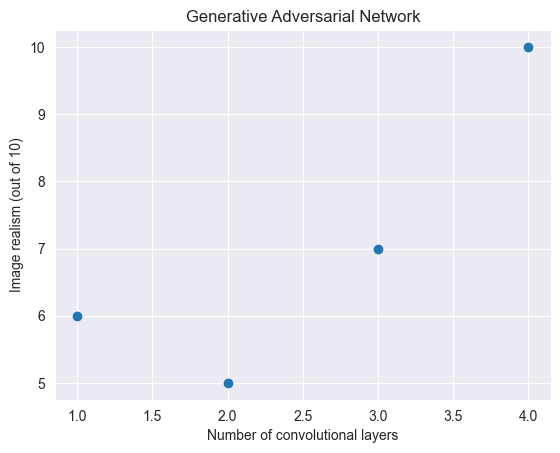

In [29]:
x = np.array([1, 2, 3, 4.])
y = np.array([6, 5, 7, 10.])
fig, ax = plt.subplots()
plt.title('Generative Adversarial Network')
plt.xlabel('Number of convolutional layers')
plt.ylabel('Image realism (out of 10)')
_ = ax.scatter(x, y)

From the general regression equation $y = \beta_0 + \beta_1 x$, we have four equations (one for each instance $i$) with the two unknown parameters $\beta_0$ and $\beta_1$:

$$6 = \beta_0 + \beta_1$$
$$5 = \beta_0 + 2\beta_1$$
$$7 = \beta_0 + 3\beta_1$$
$$10 = \beta_0 + 4\beta_1$$

I'll skip the algebra here.

In [30]:
A = np.array([[8, 20],[20, 60]])
A

array([[ 8, 20],
       [20, 60]])

In [31]:
z = np.array([56, 154])

In [32]:
Ainv = np.linalg.inv(A)
Ainv

array([[ 0.75, -0.25],
       [-0.25,  0.1 ]])

In [33]:
w = np.dot(Ainv, z)
w

array([3.5, 1.4])

The squared error across all four equations has the parameters $\beta_0 = 3.5$ and $\beta_1 = 1.4$.

$$\hat{y} = 3.5 + 1.4 x$$

In [34]:
xline = np.linspace(1, 4, 1000)
yline = w[0] + w[1]*xline

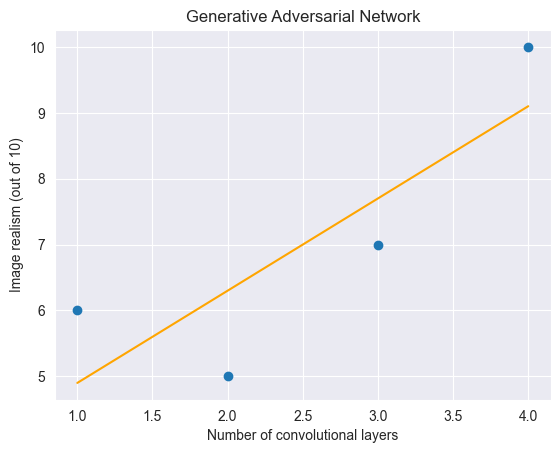

In [35]:
fig, ax = plt.subplots()
plt.title('Generative Adversarial Network')
plt.xlabel('Number of convolutional layers')
plt.ylabel('Image realism (out of 10)')
ax.scatter(x, y)
_ = plt.plot(xline, yline, color='orange')

To output $\hat{y}_i$ across all instances of $i$:

$$\hat{y} = Xw$$

In [10]:
X = np.concatenate([np.matrix(np.ones(x.size)).T, np.matrix(x).T], axis=1)
X

matrix([[1., 1.],
        [1., 2.],
        [1., 3.],
        [1., 4.]])

In [11]:
yhat = np.dot(X, w)
yhat

matrix([[4.9, 6.3, 7.7, 9.1]])

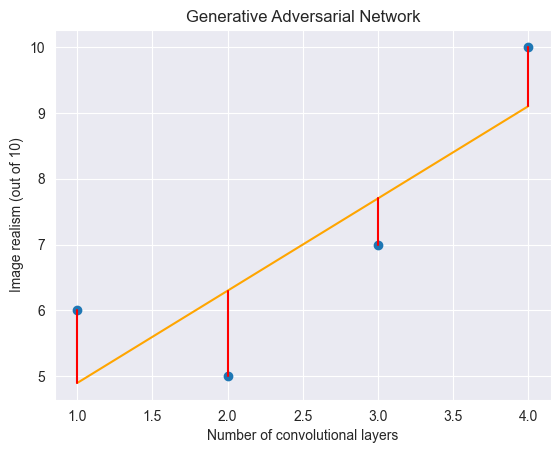

In [12]:
fig, ax = plt.subplots()
plt.title('Generative Adversarial Network')
plt.xlabel('Number of convolutional layers')
plt.ylabel('Image realism (out of 10)')
ax.scatter(x, y)
_ = plt.plot(xline, yline, color='orange')
for i in range(x.size):
    plt.plot([x[i],x[i]], [y[i],yhat[0,i]], color='red')

#### Example 2 - OLS

In [36]:
iris = sns.load_dataset('iris')

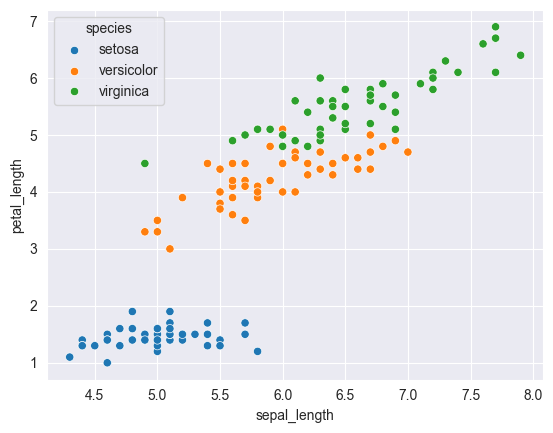

In [37]:
_ = sns.scatterplot(x='sepal_length', y='petal_length', hue='species', data=iris)

In [38]:
dummy = pd.get_dummies(iris.species, dtype = 'int64') # int64 dtype required to avoid ValueError when calling sm.OLS() below
dummy

,setosa,versicolor,virginica
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0
...,...,...,...
145,0,0,1
146,0,0,1
147,0,0,1
148,0,0,1


In [39]:
y = iris.petal_length
X = pd.concat([iris.sepal_length, dummy.setosa, dummy.versicolor], axis=1)
X # virginica as "baseline" where setosa and versicolor are both 0

,sepal_length,setosa,versicolor
0,5.1,1,0
1,4.9,1,0
2,4.7,1,0
3,4.6,1,0
4,5.0,1,0
...,...,...,...
145,6.7,0,0
146,6.3,0,0
147,6.5,0,0
148,6.2,0,0


In [40]:
X = sm.add_constant(X) # y intercept
X

,const,sepal_length,setosa,versicolor
0,1.0,5.1,1,0
1,1.0,4.9,1,0
2,1.0,4.7,1,0
3,1.0,4.6,1,0
4,1.0,5.0,1,0
...,...,...,...,...
145,1.0,6.7,0,0
146,1.0,6.3,0,0
147,1.0,6.5,0,0
148,1.0,6.2,0,0


In [41]:
model = sm.OLS(y, X)

In [42]:
result = model.fit()

In [43]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           petal_length   R-squared:                       0.975
Model:                            OLS   Adj. R-squared:                  0.974
Method:                 Least Squares   F-statistic:                     1890.
Date:                Mon, 27 Jan 2025   Prob (F-statistic):          1.46e-116
Time:                        16:57:02   Log-Likelihood:                -21.237
No. Observations:                 150   AIC:                             50.47
Df Residuals:                     146   BIC:                             62.52
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            1.3877      0.301      4.611      0.000       0.793       1.982
sepal_length     0.6321      0.045     13.962      0.000       0.543       0.722
setosa          -3.0900      0.091    -33.870      0.000      -3.270      -2.910
versicolor      -0.8799      0.064    -13.800      0.000      -1.006      -0.754
==============================================================================
Omnibus:                        0.652   Durbin-Watson:                   1.757
Prob(Omnibus):                  0.722   Jarque-Bera (JB):                0.310
Skew:                          -0.022   Prob(JB):                        0.856
Kurtosis:                       3.218   Cond. No.                         82.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [44]:
beta = result.params
beta

const           1.387660
sepal_length    0.632110
setosa         -3.090002
versicolor     -0.879864
dtype: float64

In [45]:
xline = np.linspace(4, 8, 1000)
vi_yline = beta['const'] + beta['sepal_length']*xline
se_yline = beta['const'] + beta['sepal_length']*xline + beta['setosa']
ve_yline = beta['const'] + beta['sepal_length']*xline + beta['versicolor']

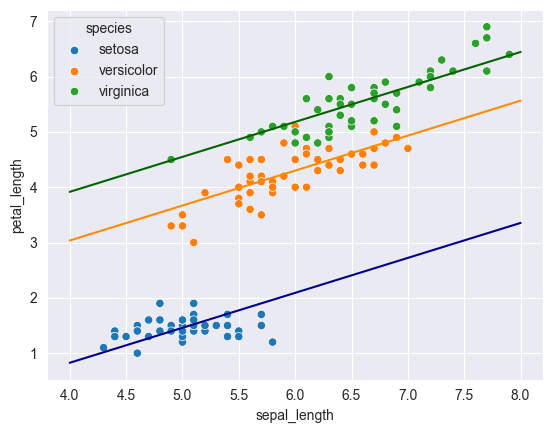

In [46]:
sns.scatterplot(x='sepal_length', y='petal_length', hue='species', data=iris)
plt.plot(xline, vi_yline, color='darkgreen')
plt.plot(xline, se_yline, color='darkblue')
_ = plt.plot(xline, ve_yline, color='darkorange')

Now using our refined model, such that it predicts the petal length of a versicolor iris with a 5.5cm-long sepal:

In [47]:
x_sepall_i = 5.5
x_setosa_i = 0
x_versic_i = 1

In [48]:
y_i = beta['const'] + beta['sepal_length']*x_sepall_i + beta['setosa']*x_setosa_i + beta['versicolor']*x_versic_i
y_i

np.float64(3.9844000800899444)

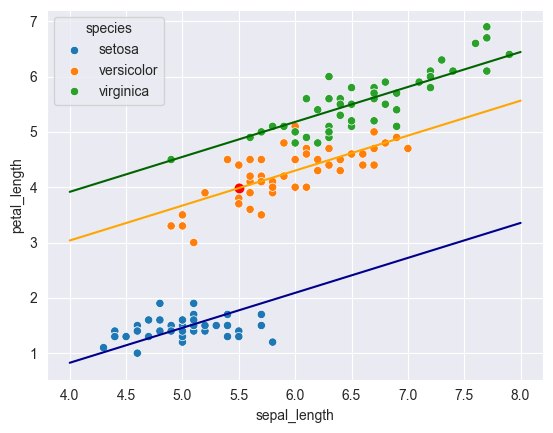

In [49]:
sns.scatterplot(x='sepal_length', y='petal_length', hue='species', data=iris)
plt.plot(xline, vi_yline, color='darkgreen')
plt.plot(xline, se_yline, color='darkblue')
plt.plot(xline, ve_yline, color='orange')
_ = plt.scatter(x_sepall_i, y_i, marker='o', color='red')

In [50]:
x_sepall_i = 5.5
x_setosa_i = 0
x_versic_i = 0 # the only change

In [51]:
x_i = np.array([1, x_sepall_i, x_versic_i, x_versic_i])
y_i = np.dot(x_i, beta)

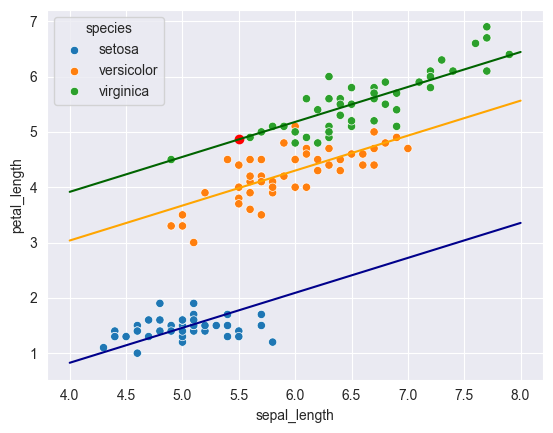

In [52]:
sns.scatterplot(x='sepal_length', y='petal_length', hue='species', data=iris)
plt.plot(xline, vi_yline, color='darkgreen')
plt.plot(xline, se_yline, color='darkblue')
plt.plot(xline, ve_yline, color='orange')
_ = plt.scatter(x_i[1], y_i, marker='o', color='red')